In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Data/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

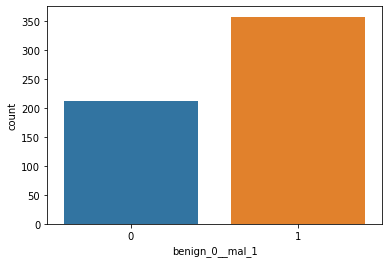

In [6]:
sns.countplot(x = 'benign_0__mal_1', data = df)

<AxesSubplot:>

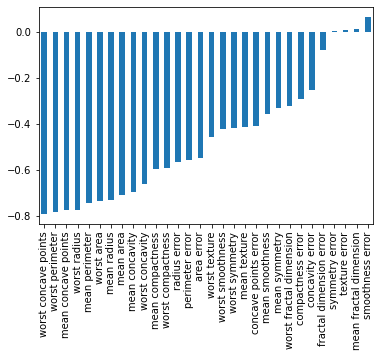

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<Figure size 720x720 with 0 Axes>

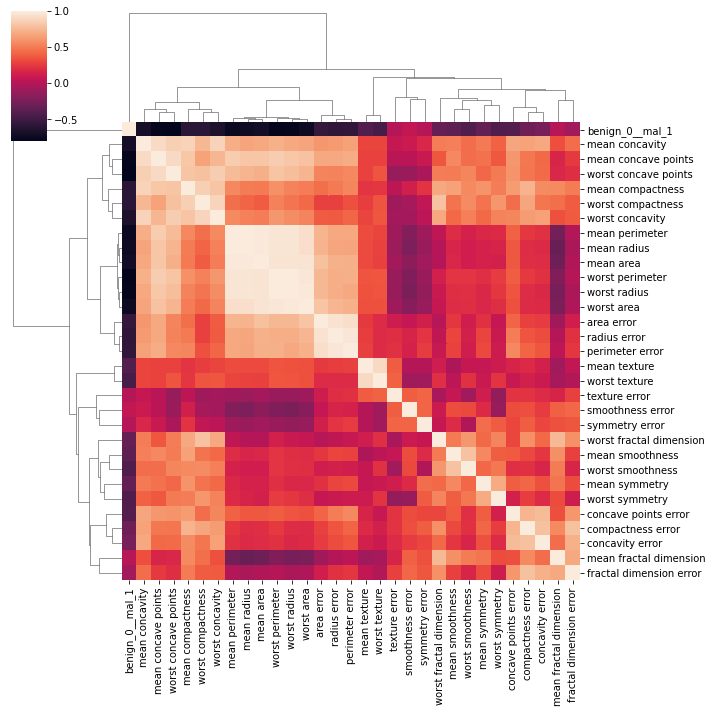

In [15]:
plt.figure(figsize = (10,10))
sns.clustermap(df.corr())

In [16]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [24]:
X_train.shape

(426, 30)

In [26]:
#MODEL CREATION

model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))        #since we are doing a binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [27]:
#MODEL FITTING

model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6930 - val_loss: 0.6701
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6621 - val_loss: 0.6389
Epoch 3/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6308 - val_loss: 0.6037
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6000 - val_loss: 0.5628
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5572 - val_loss: 0.5122
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5119 - val_loss: 0.4577
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4729 - val_loss: 0.4034
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4106 - val_loss: 0.3536
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3683 - val_loss: 0.3119
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3369 - val_loss: 0.2812
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0629 - val_loss: 0.0628
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0674 - val_loss: 0.0574
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0627 - val_loss: 0.0608
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0445 - val_loss: 0.0640
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0667 - val_loss: 0.0566
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0566 - val_loss: 0.0624
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.0606
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0696 - val_loss: 0.0576
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0554 - val_loss: 0.0571
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0547 - val_loss: 0.0639


14/14 [==============================] - 0s 4ms/step - loss: 0.0248 - val_loss: 0.1015
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0257 - val_loss: 0.1026
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0213 - val_loss: 0.0970
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0262 - val_loss: 0.0985
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0981
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0304 - val_loss: 0.0964
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.0982
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0240 - val_loss: 0.0995
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.0932
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0208 - val_loss: 0.1151
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.1960
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.1732
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.2164
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.1752
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.2182
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0078 - val_loss: 0.1695
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 0.1894
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.1872
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 0.1809
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.2200
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.2917
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.2905
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.2715
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.3006
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.3082
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.2806
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.3102
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.2810
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.2839
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.2996
Epoc

In [28]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

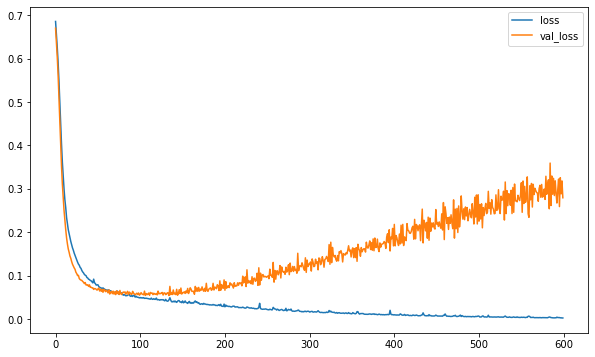

In [30]:
loss.plot(figsize = (10,6))

#notice the overfitting

In [31]:
#       AVOIDING OVERFITTING

In [32]:
#redefining the model

model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))        #since we are doing a binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
#help(EarlyStopping)

In [36]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)   
#we want to minimize the validation loss. Patience is the no. of epochs to wait for results to start improving b4 stopping.

In [37]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), 
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6849 - val_loss: 0.6515
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6489 - val_loss: 0.6170
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6212 - val_loss: 0.5745
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5799 - val_loss: 0.5298
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5414 - val_loss: 0.4827
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5086 - val_loss: 0.4363
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4566 - val_loss: 0.3893
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4209 - val_loss: 0.3456
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3741 - val_loss: 0.3068
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3368 - val_loss: 0.2717
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.0491 - val_loss: 0.0525
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0788 - val_loss: 0.0523
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0518 - val_loss: 0.0533
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0404 - val_loss: 0.0519
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0560 - val_loss: 0.0521
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0490 - val_loss: 0.0535
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0506 - val_loss: 0.0533
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0380 - val_loss: 0.0540
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0415 - val_loss: 0.0519
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0796 - val_loss: 0.0528
Epoch 93/600


<AxesSubplot:>

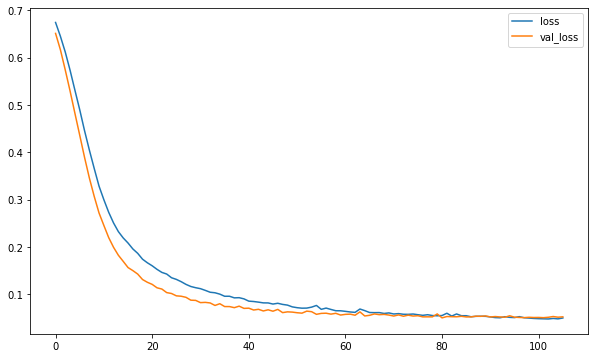

In [38]:
loss = pd.DataFrame(model.history.history)
loss.plot(figsize = (10,6))

In [41]:
# we can also add DROP OUT LAYERS to avoid further overfitting: This turns off a certain % of neurons during certain epochs

#redefining the model

model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.3))   #30% of the neurons will be turned off during each batch training i.e. w & b unaffected

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.3))   #30% of the neurons will be turned off during each batch training i.e. w & b unaffected

model.add(Dense(1, activation = 'sigmoid'))        #since we are doing a binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [42]:
# Note: We are also using the early_stop

model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), 
         callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7072 - val_loss: 0.6620
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6636 - val_loss: 0.6414
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6544 - val_loss: 0.6186
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6303 - val_loss: 0.5853
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5982 - val_loss: 0.5339
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5714 - val_loss: 0.4858
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5197 - val_loss: 0.4418
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4972 - val_loss: 0.4006
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4522 - val_loss: 0.3679
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4146 - val_loss: 0.3307
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1082 - val_loss: 0.0486
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0534 - val_loss: 0.0483
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0895 - val_loss: 0.0491
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0668 - val_loss: 0.0488
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0904 - val_loss: 0.0499
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0724 - val_loss: 0.0453
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0714 - val_loss: 0.0563
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1024 - val_loss: 0.0533
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0707 - val_loss: 0.0449
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0878 - val_loss: 0.0536


<AxesSubplot:>

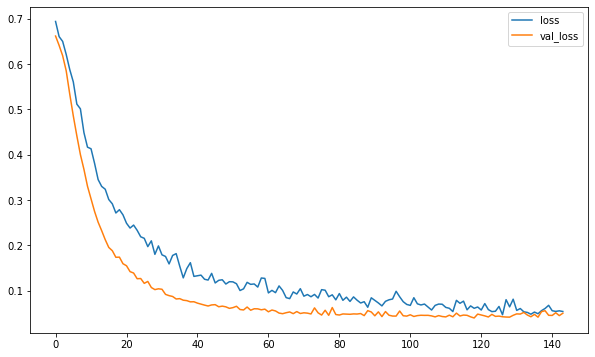

In [43]:
loss = pd.DataFrame(model.history.history)
loss.plot(figsize = (10,6))

#Note that this time the validation loss is actually much lower than the training loss

In [50]:
predictions = model.predict_classes(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [55]:
print(confusion_matrix(y_test, predictions))

[[53  1]
 [ 2 87]]
